# Seldon Labs 

In [ ]:
import sys
sys.path.append('../')
import pygambit as gbt
import numpy as np
from src.sampling import generate_distribution, generate_samples
import matplotlib.pyplot as plt
import pandas as pd

## Product v0.0

This notebook will experiment with the first version of Seldom Labs product. We will model payoffs as a random variable and run monte-carlo simulations of the game to understand the likely outcomes and possible black-swan events

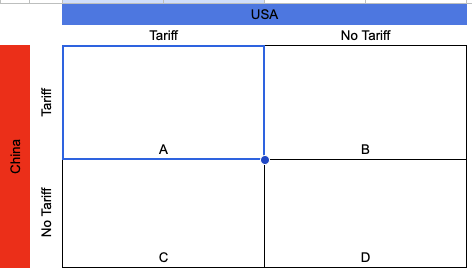

### Players

In [ ]:
player_1 = 'China' 
player_2 = 'USA'

### Monte-Carlo Simulation

In [ ]:
def create_two_player_game(player1, player2, payoff1, payoff2):
    """
    Create a Prisoner's Dilemma game using Pygambit.
    
    Parameters:
    - cooperate_reward: Payoff when both players cooperate (default: -1)
    - defect_reward: Payoff when both players defect (default: 0)
    - temptation: Payoff for defecting while other cooperates (default: 1)
    - sucker: Payoff for cooperating while other defects (default: -2)
    
    Returns:
    - game: Pygambit strategic game object
    """
    # Create a new strategic game with 2 players, 2 strategies each
    game = gbt.Game.from_arrays(payoff1, payoff2)
    
    # Set the game title
    game.title = "Prisoner's Dilemma"
    
    # Set player names
    game.players[0].label = player1
    game.players[1].label = player2
    
    # Set strategy labels for both players
    game.players[0].strategies[0].label = "Tariff"
    game.players[0].strategies[1].label = "No Tariff"
    game.players[1].strategies[0].label = "Tariff"
    game.players[1].strategies[1].label = "No Tariff"
    
    return game

In [ ]:
def payoffs_formula(gdp, trade_deficit, political): 
    return gdp + trade_deficit + political

In [ ]:
class Player(): 
    def __init__(self, data, player_name):
        self.data = data 
        self.name = player_name
        self.fit_distributions()
        

    def fit_distributions(self): 
        for scenario, variables in self.data.items():
            for var, data in variables.items():
                x_range, density, dist = generate_distribution(data['data_points'], method='kde')
                data.update({'x_range': x_range, 'density': density, 'dist': dist})

    def calculate_payoff(self, scenario, payoff_func):
        gdp = float(generate_samples(self.data[scenario]['gdp']['dist'], num_samples=1)[0])
        trade = float(generate_samples(self.data[scenario]['trade']['dist'], num_samples=1)[0])
        political = float(generate_samples(self.data[scenario]['political']['dist'], num_samples=1)[0])
        variables_used = {'gdp': gdp, "trade": trade, "political": political}
        return variables_used, payoff_func(gdp, trade, political)
        

In [ ]:
def record_samples(scenario,samples_dictionary, record_dictionary): 
    for key in samples_dictionary: 
        record_dictionary[scenario][key].append(samples_dictionary[key])
    return

In [ ]:
def record_results(df_dict, player1_samples, player2_samples, player1_payoffs, player2_payoffs, results, player_1, player_2): 
    # Record variables
    for scenario in player1_samples:
        for variable in player1_samples[scenario]: 
            df_dict[f'{player1.name}_{scenario}_{variable}'] = player1_samples[scenario][variable]

    for scenario in player2_samples:
        for variable in player2_samples[scenario]: 
            df_dict[f'{player2.name}_{scenario}_{variable}'] = player2_samples[scenario][variable]

    # record payoffs and outcomes
    for scenario in player1_payoffs:
        df_dict[f'{player1.name}_{scenario}_payoffs'] = player1_payoffs[scenario]
        
    for scenario in player2_payoffs:
        df_dict[f'{player2.name}_{scenario}_payoffs'] = player2_payoffs[scenario]

    # record ouctomes 
    df_dict[f'{player1.name}_tariff_probability'] = player1_payoffs['tariff']
    df_dict[f'{player1.name}_no_tariff_probability'] = player1_payoffs['no tariff']
    df_dict[f'{player2.name}_tariff_probability'] = player2_payoffs['tariff']
    df_dict[f'{player2.name}_no_tariff_probability'] = player2_payoffs['no tariff']

In [ ]:
player1_data = {"tt": {"gdp": {"data_points": [6.5, 5.7, 7]},
                       "trade": {"data_points": [8.1, 6, 12]},
                       "political": {"data_points": [0, -5, 5]},
                      },
                "tnt": {"gdp": {"data_points": [6.5, 5.7, 7]},
                        "trade": {"data_points": [8.1, 6, 12]},
                        "political": {"data_points": [-20, -5, 0]},
                       },
                "ntt": {"gdp": {"data_points": [6.5, 5.7, 7]},
                        "trade": {"data_points": [8.1, 6, 12]},
                        "political": {"data_points": [-10, -5, -15]},
                       },
                "ntnt": {"gdp": {"data_points": [6.5, 5.7, 7]},
                         "trade": {"data_points": [8.1, 6, 12]},
                         "political": {"data_points": [0 , -5, 5]},
                        }
               }

player2_data = {"tt": {"gdp": {"data_points": [3.1, 2.8 ,2.7]},
                       "trade": {"data_points": [-8.1, -6, -12]},
                       "political": {"data_points": [10, 5, 15]},
                      },
                "tnt": {"gdp": {"data_points": [3.1, 2.8 ,2.7]},
                        "trade": {"data_points": [-8.1, -6, -12]},
                        "political": {"data_points": [-20, -20, -30]},
                       },
                "ntt": {"gdp": {"data_points": [3.1, 2.8 ,2.7]},
                         "trade": {"data_points": [-8.1, -6, -12]},
                         "political": {"data_points": [20, 10, 30]},
                       },
                "ntnt": {"gdp": {"data_points": [3.1, 2.8 ,2.7]},
                          "trade": {"data_points": [-8.1, -6, -12]},
                          "political": {"data_points": [-10,-5,-15]},
                        }
               }

In [ ]:
player1_samples = {"tt": {"gdp": [],
                          "trade": [],
                          "political": [],
                         },
                   "tnt": {"gdp": [],
                           "trade": [],
                           "political": [],
                          },
                   "ntt": {"gdp": [],
                           "trade": [],
                           "political": [],
                          },
                   "ntnt": {"gdp": [],
                            "trade": [],
                            "political": [],
                           }
                  }

player2_samples = {"tt": {"gdp": [],
                          "trade": [],
                          "political": [],
                         },
                   "tnt": {"gdp": [],
                           "trade": [],
                           "political": [],
                          },
                   "ntt": {"gdp": [],
                           "trade": [],
                           "political": [],
                          },
                   "ntnt": {"gdp": [],
                            "trade": [],
                            "political": [],
                           }
                  }

In [ ]:
# Number of simulations
num_sims = 10
    
# Create players
player1 = Player(player1_data, "China")
player2 = Player(player2_data, "USA")

df_dict = {} 

player1_payoffs = {'tt': [],
                   'tnt': [],
                   'ntt': [],
                   'ntnt': [],
                   'tariff': [],
                   'no tariff':[]
                  } 

player2_payoffs = {'tt': [],
                   'tnt': [],
                   'ntt': [],
                   'ntnt': [],
                   'tariff': [],
                   'no tariff': []
                  } 


for i in range(num_sims): 
    # Sample Player 1 Payoffs 
    p1_tt_variables, p1_tt = player1.calculate_payoff('tt', payoffs_formula)
    p1_tnt_variables, p1_tnt = player1.calculate_payoff('tnt', payoffs_formula)
    p1_ntt_variables, p1_ntt = player1.calculate_payoff('ntt', payoffs_formula)
    p1_ntnt_variables, p1_ntnt = player1.calculate_payoff('ntnt', payoffs_formula)
    
    # Sample Player 2 payoffs
    p2_tt_variables, p2_tt = player2.calculate_payoff('tt', payoffs_formula)
    p2_tnt_variables, p2_tnt = player2.calculate_payoff('tnt', payoffs_formula)
    p2_ntt_variables, p2_ntt = player2.calculate_payoff('ntt', payoffs_formula)
    p2_ntnt_variables, p2_ntnt = player2.calculate_payoff('ntnt', payoffs_formula)

    payoff_player1 = [[p1_tt, p1_tnt], [p1_ntt, p1_ntnt]]
    payoff_player2 = [[p2_tt, p2_tnt], [p2_ntt, p2_ntnt]]

    g = create_two_player_game(player_1, player_2, payoff_player1, payoff_player2)
    results = gbt.nash.enumpure_solve(g)
    if len(results.equilibria) == 0: 
        print('no strategy found')
        continue
        
    # Record Samples
    player1_payoffs['tt'].append(p1_tt) 
    player1_payoffs['tnt'].append(p1_tnt) 
    player1_payoffs['ntt'].append(p1_ntt) 
    player1_payoffs['ntnt'].append(p1_ntnt) 

    player2_payoffs['tt'].append(p2_tt) 
    player2_payoffs['tnt'].append(p2_tnt) 
    player2_payoffs['ntt'].append(p2_ntt) 
    player2_payoffs['ntnt'].append(p2_ntnt) 
    
    ## Record Results
    record_samples('tt', p1_tt_variables, player1_samples)
    record_samples('tnt', p1_tnt_variables, player1_samples)
    record_samples('ntt', p1_ntt_variables, player1_samples)
    record_samples('ntnt', p1_ntnt_variables, player1_samples)

    record_samples('tt', p2_tt_variables, player2_samples)
    record_samples('tnt', p2_tnt_variables, player2_samples)
    record_samples('ntt', p2_ntt_variables, player2_samples)
    record_samples('ntnt', p2_ntnt_variables, player2_samples)

    p1_nt = float(results.equilibria[0][player_1]['No Tariff']*100)
    p1_t = float(results.equilibria[0][player_1]['Tariff']*100)
    p2_nt = float(results.equilibria[0][player_2]['No Tariff']*100)
    p2_t = float(results.equilibria[0][player_2]['Tariff']*100)

    player1_payoffs['tariff'].append(p1_t) 
    player1_payoffs['no tariff'].append(p1_nt) 

    player2_payoffs['tariff'].append(p2_t) 
    player2_payoffs['no tariff'].append(p2_nt) 

In [ ]:
record_results(df_dict, player1_samples, player2_samples, player1_payoffs, player2_payoffs, results, player_1, player_2)

In [ ]:
columns = ['China_tt_gdp', 'China_tt_trade','China_tt_political', 
           'China_tnt_gdp', 'China_tnt_trade','China_tnt_political',
           'China_ntt_gdp', 'China_ntt_trade', 'China_ntt_political',
           'China_ntnt_gdp', 'China_ntnt_trade','China_ntnt_political',	
           'USA_tt_gdp', 'USA_tt_trade','USA_tt_political',	
           'USA_tnt_gdp','USA_tnt_trade','USA_tnt_political', 
           'USA_ntt_gdp','USA_ntt_trade','USA_ntt_political',
           'USA_ntnt_gdp', 'USA_ntnt_trade','USA_ntnt_political',	
           'China_tt_payoffs','USA_tt_payoffs',
           'China_tnt_payoffs','USA_tnt_payoffs',
           'China_ntt_payoffs','USA_ntt_payoffs',
           'China_ntnt_payoffs','USA_ntnt_payoffs',
           'China_tariff_probability',
           'China_no_tariff_probability',	
           'USA_tariff_probability', 
           'USA_no_tariff_probability']

In [ ]:
df = pd.DataFrame.from_dict(df_dict)[columns]
df.to_excel('results.xlsx')

In [ ]:
# look at distributions
def plot_distribution_and_samples(title, data_points, x_range, density, samples):
    """
    Plot original points, fitted distribution, and generated samples.
    """
    plt.figure(figsize=(12, 6))
    
    # Plot original data points
    plt.hist(data_points, bins='auto', density=True, alpha=0.5, 
             label='Original Data', color='lightblue')
    
    # Plot fitted distribution
    plt.plot(x_range, density, 'r-', label='Fitted Distribution')
    
    # Plot generated samples
    plt.hist(samples, bins='auto', density=True, alpha=0.5,
             label='Generated Samples', color='lightgreen')
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    return plt

In [ ]:
for key in player1.data: 
    for variable in player1.data[key]:
        title = f'Player 1 Scenario: {key} Variable: {variable}' 
        data_points = player1.data[key][variable]['data_points']
        x_range = player1.data[key][variable]['x_range']
        density = player1.data[key][variable]['density']
        dist = player1.data[key][variable]['density']
        samples = player1_samples[key][variable] 
        plot_distribution_and_samples(title, data_points, x_range, density, samples)

In [ ]:
for key in player2.data: 
    for variable in player2.data[key]:
        title = f'Player 2 Scenario: {key} Variable: {variable}' 
        data_points = player2.data[key][variable]['data_points']
        x_range = player2.data[key][variable]['x_range']
        density = player2.data[key][variable]['density']
        dist = player2.data[key][variable]['density']
        samples = player2_samples[key][variable] 
        plot_distribution_and_samples(title, data_points, x_range, density, samples)

In [ ]:
# generate report 